https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

pointers to explore

can we combine 2 search algos, eg genetic/ randomized and then grid

speed of each algorithm

In [ ]:
  !pip install opendatasets
!pip install pandas
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=06dd82aafdb430fc0954d20664f7ea4ac69161721cb2d85b929d2b940e262a08
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

from tpot import TPOTRegressor
from matplotlib import pyplot as plt

In [ ]:
import opendatasets as od


od.download("https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marthadimgba
Your Kaggle Key: ··········


100%|██████████| 12.3k/12.3k [00:00<00:00, 5.56MB/s]

In [ ]:
data=pd.read_csv("/content/the-boston-houseprice-data/boston.csv")
data=data.dropna()
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


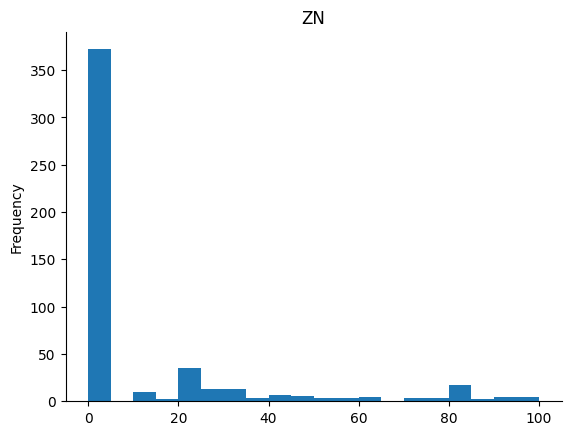

In [ ]:
# @title ZN


data['ZN'].plot(kind='hist', bins=20, title='ZN')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Quick Check data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


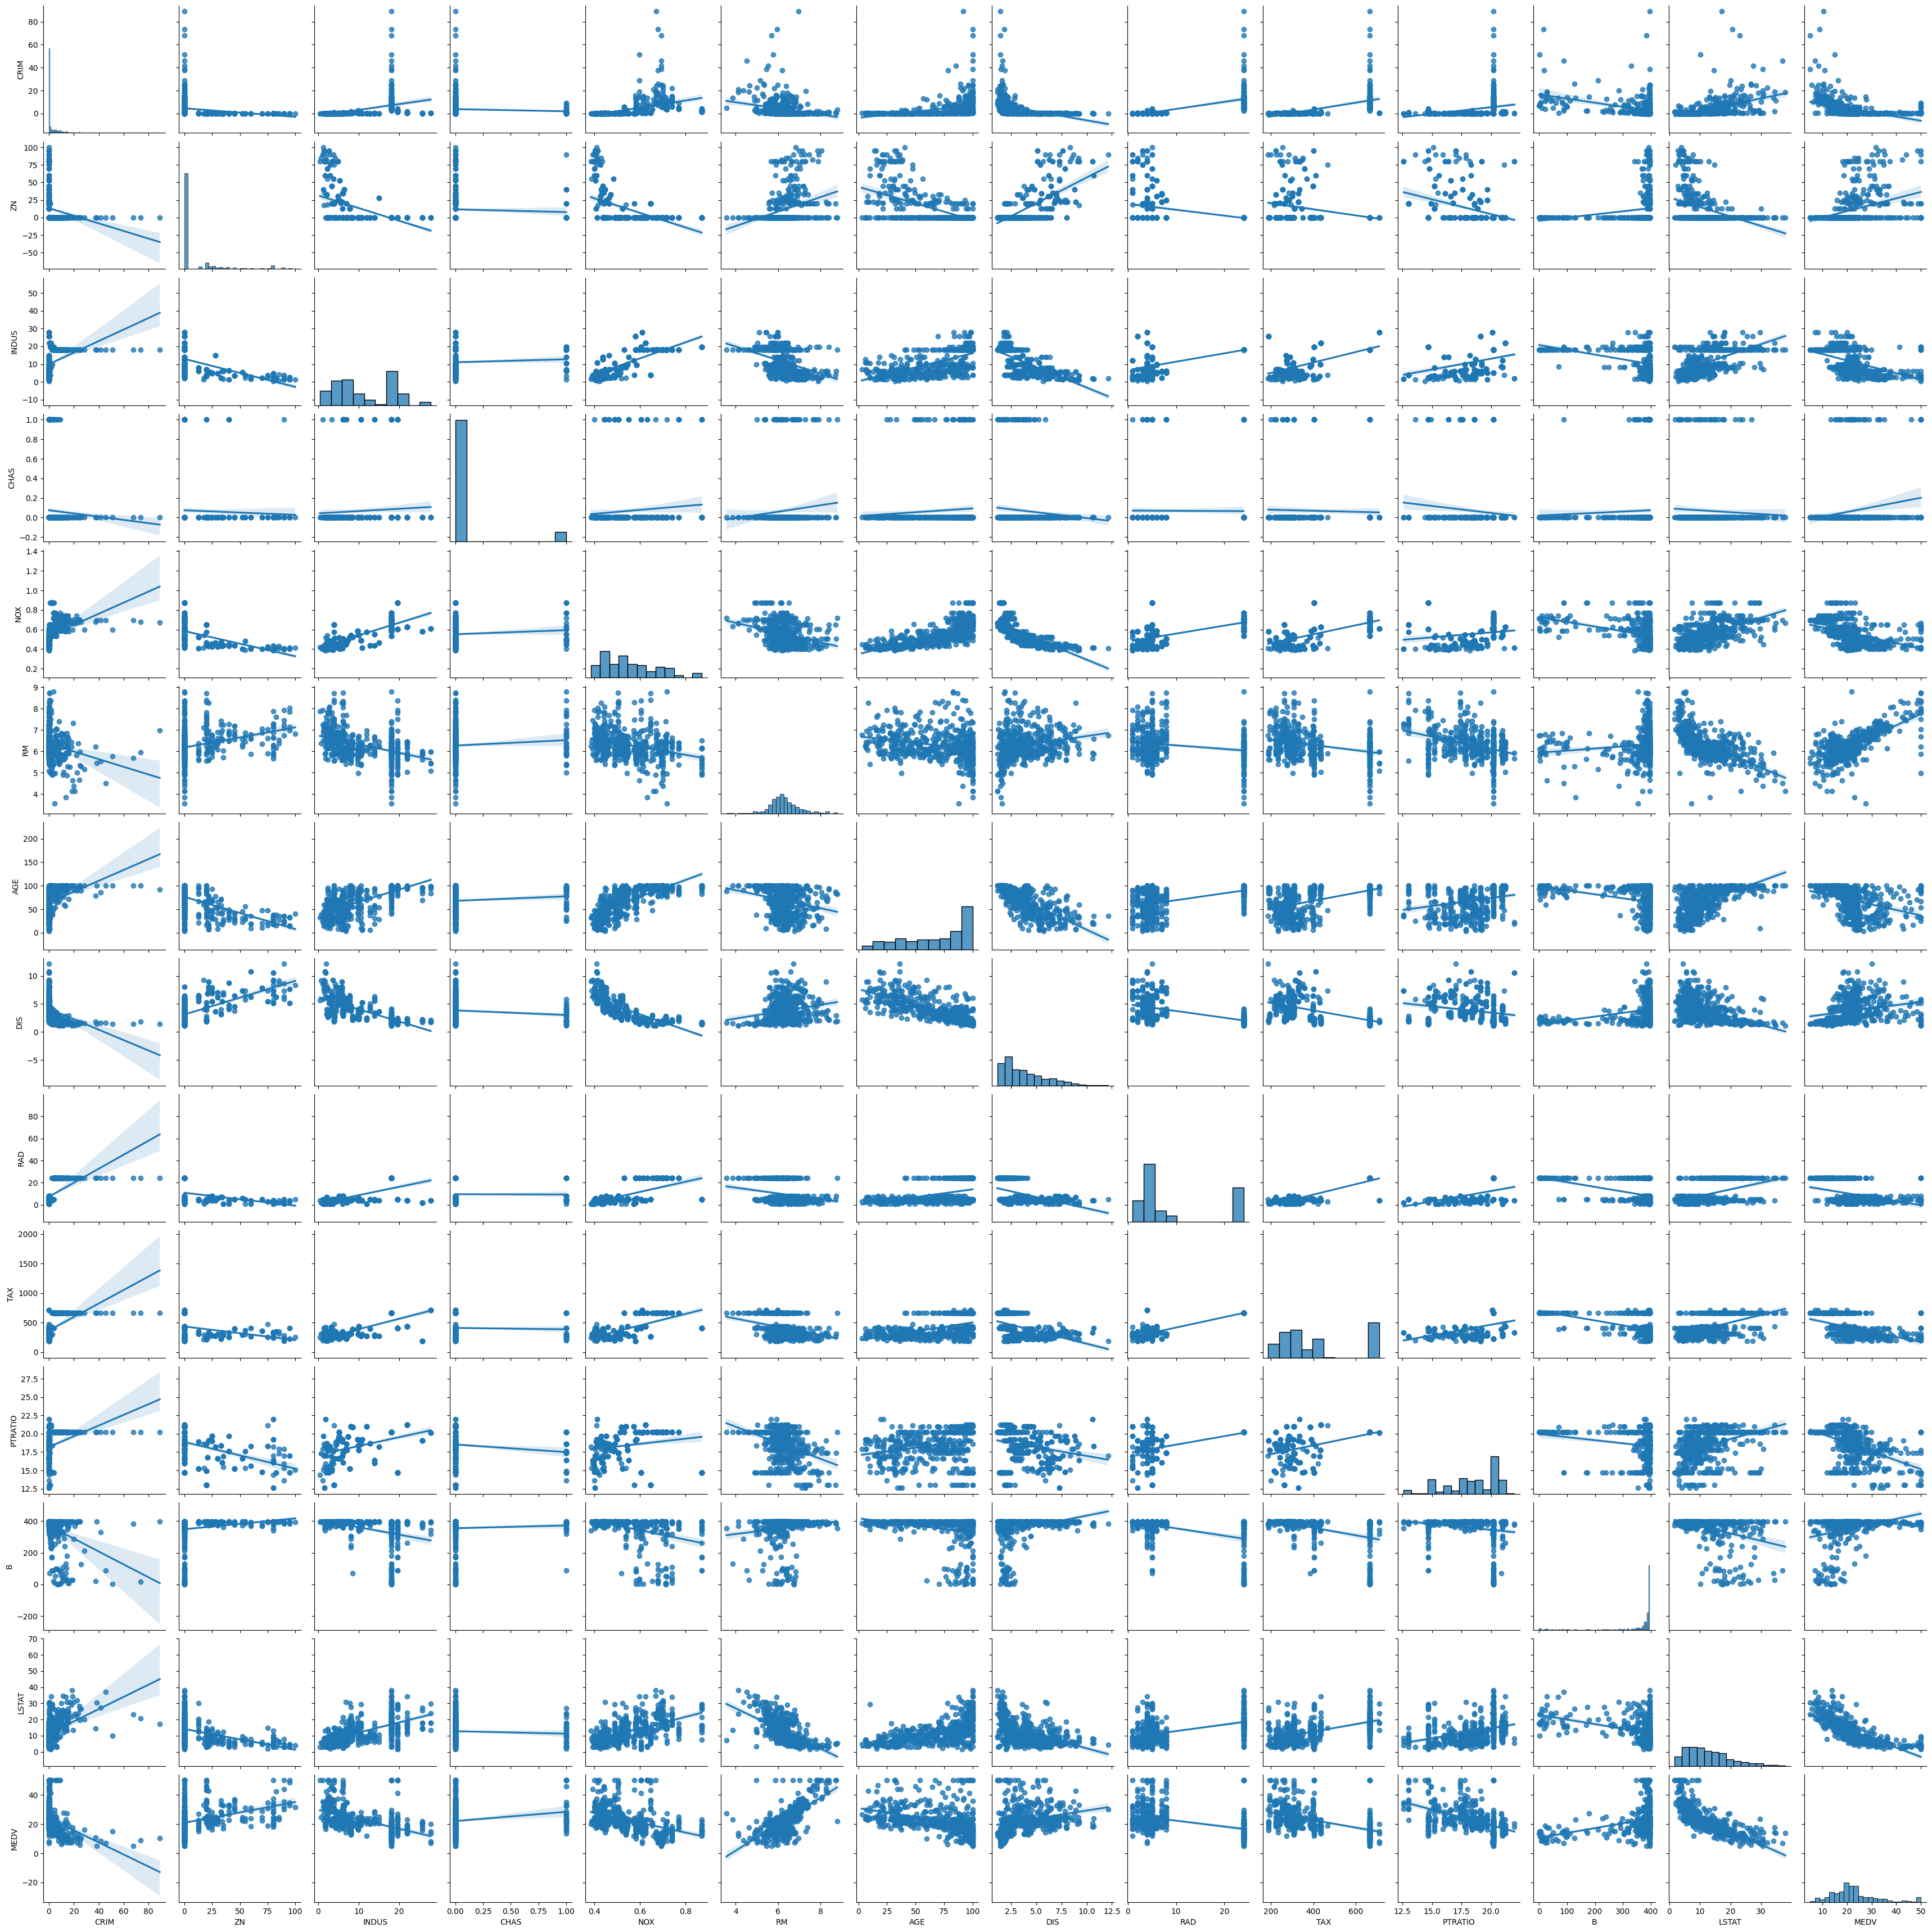

In [ ]:
sns.pairplot(data,kind="reg")


In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score#for classification only

In [ ]:
#X=data[["CRIM","INDUS","AGE"]]
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (354, 13)
X_test (152, 13)
y_train (354,)
y_test (152,)


In [ ]:
xgb_model=XGBRegressor().fit(X_train,y_train)

In [ ]:
y_pred=xgb_model.predict(X_test)
mean_squared_error(y_pred,y_test) #lower the better

9.466555889875238

Model Tuning


-Grid Search

In [ ]:
xgb_params={

    "colsample_bytree":[0.4, 0.6, 0.8, 1.0],
    "learning_rate":[0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5],
    "max_depth":[3, 4, 5, 6, 7, 8],
    'subsample': [0.5, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 10],
    "n_estimators":[100,200]
}

# colsample_bytree: Number of sample per tree.
# max_depth: Prevent to overfit
#https://www.datasnips.com/blog/2021/7/11/XGBoost-Parameter-Tuning/

In [ ]:
%%time

start_time = time.time()
xgb_gridSearch=GridSearchCV(xgb_model,xgb_params, scoring='neg_mean_absolute_error', cv=10,n_jobs=-1,verbose=0)
xgb_gridSearch.fit(X_train,y_train)
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")

Execution time: 4453.755547 seconds
CPU times: user 2min 31s, sys: 12.1 s, total: 2min 43s
Wall time: 1h 14min 13s


In [ ]:
xgb_gridSearch.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
xgb_gridSearch.best_score_

-2.2218827314376832

In [ ]:
xgb_best = XGBRegressor(**xgb_gridSearch.best_params_)
xgb_best.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb_best.predict(X_test)
mean_squared_error(y_pred,y_test)

8.024099640754992

Random Search

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV
 #Initialize the regressor
xgb=XGBRegressor()


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Choose an appropriate metric
    cv=10,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train,y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Refit the model on the entire dataset using the best parameters
#best_xgb_model = xgb(**random_search.best_params_)
#best_xgb_model.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best cross-validation score: -2.368321728554983
CPU times: user 608 ms, sys: 76.9 ms, total: 685 ms
Wall time: 13.7 s


In [ ]:
best_xgb_model = XGBRegressor(**random_search.best_params_)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=best_xgb_model.predict(X_test)
print('mean_squared_error:',mean_squared_error(y_test, y_pred))

mean_squared_error: 9.663656518450036


Genetic Algorithm


In [ ]:
# Define the TPOT configuration for regression
tpot_config = {
    'xgboost.XGBRegressor': {
        'n_estimators': [100, 200],
        'max_depth': [3, 4, 5, 6, 7, 8],
        'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5],
       'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0, 1.5, 1.7, 2.0],
        'min_child_weight': [1, 3, 5, 10]
    }
}

POPULATION GENERATION COMPARISON

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=10, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.3278184687069485

Generation 2 - Current best internal CV score: -2.3278184687069485

Generation 3 - Current best internal CV score: -2.324713139541566

Generation 4 - Current best internal CV score: -2.2926892678321353

Generation 5 - Current best internal CV score: -2.2904863056758096

Generation 6 - Current best internal CV score: -2.2904863056758096

Generation 7 - Current best internal CV score: -2.281015032889351

Generation 8 - Current best internal CV score: -2.281015032889351

Generation 9 - Current best internal CV score: -2.281015032889351

Generation 10 - Current best internal CV score: -2.2418488136019024

Best pipeline: XGBRegressor(input_matrix, colsample_bytree=0.8, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.5)
Best score (NMAE): -2.0137


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                           

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=30, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.277158772756183

Generation 2 - Current best internal CV score: -2.277158772756183

Generation 3 - Current best internal CV score: -2.277158772756183

Generation 4 - Current best internal CV score: -2.277158772756183

Generation 5 - Current best internal CV score: -2.2218827314376832

Generation 6 - Current best internal CV score: -2.2218827314376832

Generation 7 - Current best internal CV score: -2.2218827314376832

Generation 8 - Current best internal CV score: -2.2218827314376832

Generation 9 - Current best internal CV score: -2.2218827314376832

Generation 10 - Current best internal CV score: -2.2218827314376832

Best pipeline: XGBRegressor(input_matrix, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8)
Best score (NMAE): -1.9633


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                            

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=50, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2730716605413526

Generation 2 - Current best internal CV score: -2.2492472370616974

Generation 3 - Current best internal CV score: -2.2492472370616974

Generation 4 - Current best internal CV score: -2.2492472370616974

Generation 5 - Current best internal CV score: -2.2492472370616974

Generation 6 - Current best internal CV score: -2.2492472370616974

Generation 7 - Current best internal CV score: -2.2492472370616974

Generation 8 - Current best internal CV score: -2.2481173158524523

Generation 9 - Current best internal CV score: -2.2364431095728796

Generation 10 - Current best internal CV score: -2.2364431095728796

Best pipeline: XGBRegressor(CombineDFs(input_matrix, input_matrix), colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.5)
Best score (NMAE): -1.8902


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=70, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/770 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2499825615655804

Generation 2 - Current best internal CV score: -2.2499825615655804

Generation 3 - Current best internal CV score: -2.2218827314376832

Generation 4 - Current best internal CV score: -2.2218827314376832

Generation 5 - Current best internal CV score: -2.2218827314376832

Generation 6 - Current best internal CV score: -2.2218827314376832

Generation 7 - Current best internal CV score: -2.2218827314376832

Generation 8 - Current best internal CV score: -2.2218827314376832

Generation 9 - Current best internal CV score: -2.2218827314376832

Generation 10 - Current best internal CV score: -2.2218827314376832

Best pipeline: XGBRegressor(CombineDFs(input_matrix, input_matrix), colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8)
Best score (NMAE): -1.9633


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_d

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=100, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2656572345854746

Generation 2 - Current best internal CV score: -2.2645597832846263

Generation 3 - Current best internal CV score: -2.2645597832846263

Generation 4 - Current best internal CV score: -2.260704950113145

Generation 5 - Current best internal CV score: -2.245060062378172

Generation 6 - Current best internal CV score: -2.245060062378172

Generation 7 - Current best internal CV score: -2.2418488136019024

Generation 8 - Current best internal CV score: -2.2418488136019024

Generation 9 - Current best internal CV score: -2.2418488136019024

Generation 10 - Current best internal CV score: -2.2255811944613377

Best pipeline: XGBRegressor(XGBRegressor(input_matrix, colsample_bytree=0.8, learning_rate=0.03, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.5), colsample_bytree=0.4, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.5)
Best score (NMAE): -1.9373


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.8,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=150, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/1650 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2730716605413526

Generation 2 - Current best internal CV score: -2.2692702734962342

Generation 3 - Current best internal CV score: -2.262709938836476

Generation 4 - Current best internal CV score: -2.2499825615655804

Generation 5 - Current best internal CV score: -2.218408595342485

Generation 6 - Current best internal CV score: -2.218408595342485

Generation 7 - Current best internal CV score: -2.218408595342485

Generation 8 - Current best internal CV score: -2.2183524742126464

Generation 9 - Current best internal CV score: -2.2180049867630007

Generation 10 - Current best internal CV score: -2.1996657125684953

Best pipeline: XGBRegressor(XGBRegressor(input_matrix, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8), colsample_bytree=1.0, learning_rate=0.03, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.5)
Best score (NMAE): -1.9425


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=1.0,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=10, offspring_size = 6, population_size=200, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2462629687445506

Generation 2 - Current best internal CV score: -2.2462629687445506

Generation 3 - Current best internal CV score: -2.2462629687445506

Generation 4 - Current best internal CV score: -2.243915226747119

Generation 5 - Current best internal CV score: -2.243915226747119

Generation 6 - Current best internal CV score: -2.2418488136019024

Generation 7 - Current best internal CV score: -2.2218827314376832

Generation 8 - Current best internal CV score: -2.218408595342485

Generation 9 - Current best internal CV score: -2.218408595342485

Generation 10 - Current best internal CV score: -2.207230661838774

Best pipeline: XGBRegressor(XGBRegressor(input_matrix, colsample_bytree=0.8, learning_rate=0.03, max_depth=4, min_child_weight=10, n_estimators=200, subsample=0.5), colsample_bytree=1.0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=200, subsample=0.8)
Best score (NMAE): -2.1355


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.8,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=10, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/210 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.322563294395568

Generation 2 - Current best internal CV score: -2.322563294395568

Generation 3 - Current best internal CV score: -2.2764263087984116

Generation 4 - Current best internal CV score: -2.2764263087984116

Generation 5 - Current best internal CV score: -2.2481173158524523

Generation 6 - Current best internal CV score: -2.2481173158524523

Generation 7 - Current best internal CV score: -2.2481173158524523

Generation 8 - Current best internal CV score: -2.2481173158524523

Generation 9 - Current best internal CV score: -2.2481173158524523

Generation 10 - Current best internal CV score: -2.2481173158524523

Generation 11 - Current best internal CV score: -2.2481173158524523

Generation 12 - Current best internal CV score: -2.2481173158524523

Generation 13 - Current best internal CV score: -2.2481173158524523

Generation 14 - Current best internal CV score: -2.2481173158524523

Generation 15 - Current best internal CV sco

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                           

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=30, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/630 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.268793165297735

Generation 2 - Current best internal CV score: -2.268793165297735

Generation 3 - Current best internal CV score: -2.268793165297735

Generation 4 - Current best internal CV score: -2.260704950113145

Generation 5 - Current best internal CV score: -2.260704950113145

Generation 6 - Current best internal CV score: -2.2418488136019024

Generation 7 - Current best internal CV score: -2.2418488136019024

Generation 8 - Current best internal CV score: -2.2418488136019024

Generation 9 - Current best internal CV score: -2.2418488136019024

Generation 10 - Current best internal CV score: -2.2418488136019024

Generation 11 - Current best internal CV score: -2.241833984602066

Generation 12 - Current best internal CV score: -2.241833984602066

Generation 13 - Current best internal CV score: -2.241833984602066

Generation 14 - Current best internal CV score: -2.236662763005211

Generation 15 - Current best internal CV score: -2.

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>)),
                                                                                ('functiontransformer-2',
                                                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>))])),
                                                ('functiontransformer',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=50, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.25968695981162

Generation 2 - Current best internal CV score: -2.25968695981162

Generation 3 - Current best internal CV score: -2.25968695981162

Generation 4 - Current best internal CV score: -2.25968695981162

Generation 5 - Current best internal CV score: -2.2481173158524523

Generation 6 - Current best internal CV score: -2.2481173158524523

Generation 7 - Current best internal CV score: -2.223163711896018

Generation 8 - Current best internal CV score: -2.223163711896018

Generation 9 - Current best internal CV score: -2.223163711896018

Generation 10 - Current best internal CV score: -2.223163711896018

Generation 11 - Current best internal CV score: -2.223163711896018

Generation 12 - Current best internal CV score: -2.213149978993431

Generation 13 - Current best internal CV score: -2.213149978993431

Generation 14 - Current best internal CV score: -2.213149978993431

Generation 15 - Current best internal CV score: -2.2131499

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.6,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=70, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/1470 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.255321890452551

Generation 2 - Current best internal CV score: -2.255321890452551

Generation 3 - Current best internal CV score: -2.255321890452551

Generation 4 - Current best internal CV score: -2.255321890452551

Generation 5 - Current best internal CV score: -2.255321890452551

Generation 6 - Current best internal CV score: -2.255321890452551

Generation 7 - Current best internal CV score: -2.255321890452551

Generation 8 - Current best internal CV score: -2.255321890452551

Generation 9 - Current best internal CV score: -2.255321890452551

Generation 10 - Current best internal CV score: -2.2218827314376832

Generation 11 - Current best internal CV score: -2.2218827314376832

Generation 12 - Current best internal CV score: -2.2218827314376832

Generation 13 - Current best internal CV score: -2.2218827314376832

Generation 14 - Current best internal CV score: -2.2218827314376832

Generation 15 - Current best internal CV score: -2.

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                            

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=100, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/2100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.264555150728377

Generation 2 - Current best internal CV score: -2.264555150728377

Generation 3 - Current best internal CV score: -2.25968695981162

Generation 4 - Current best internal CV score: -2.25968695981162

Generation 5 - Current best internal CV score: -2.241833984602066

Generation 6 - Current best internal CV score: -2.241833984602066

Generation 7 - Current best internal CV score: -2.241833984602066

Generation 8 - Current best internal CV score: -2.241833984602066

Generation 9 - Current best internal CV score: -2.2364431095728796

Generation 10 - Current best internal CV score: -2.212586452862573

Generation 11 - Current best internal CV score: -2.212586452862573

Generation 12 - Current best internal CV score: -2.166447253847879

Generation 13 - Current best internal CV score: -2.166447253847879

Generation 14 - Current best internal CV score: -2.166447253847879

Generation 15 - Current best internal CV score: -2.166447

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.8,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=150, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/3150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2692702734962342

Generation 2 - Current best internal CV score: -2.257036771774292

Generation 3 - Current best internal CV score: -2.2492472370616974

Generation 4 - Current best internal CV score: -2.244430963228619

Generation 5 - Current best internal CV score: -2.244430963228619

Generation 6 - Current best internal CV score: -2.2383798033245026

Generation 7 - Current best internal CV score: -2.2383798033245026

Generation 8 - Current best internal CV score: -2.2383798033245026

Generation 9 - Current best internal CV score: -2.2383798033245026

Generation 10 - Current best internal CV score: -2.2180181448497467

Generation 11 - Current best internal CV score: -2.208851846990131

Generation 12 - Current best internal CV score: -2.208851846990131

Generation 13 - Current best internal CV score: -2.208851846990131

Generation 14 - Current best internal CV score: -2.204261513437543

Generation 15 - Current best internal CV score: -

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.6,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=20, offspring_size = 6, population_size=200, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/4200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.241833984602066

Generation 2 - Current best internal CV score: -2.2218827314376832

Generation 3 - Current best internal CV score: -2.2218827314376832

Generation 4 - Current best internal CV score: -2.2218827314376832

Generation 5 - Current best internal CV score: -2.2218827314376832

Generation 6 - Current best internal CV score: -2.2218827314376832

Generation 7 - Current best internal CV score: -2.219191421856956

Generation 8 - Current best internal CV score: -2.219191421856956

Generation 9 - Current best internal CV score: -2.219191421856956

Generation 10 - Current best internal CV score: -2.219191421856956

Generation 11 - Current best internal CV score: -2.1908180461156936

Generation 12 - Current best internal CV score: -2.1908180461156936

Generation 13 - Current best internal CV score: -2.1908180461156936

Generation 14 - Current best internal CV score: -2.1908180461156936

Generation 15 - Current best internal CV score:

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer',
                                                 FunctionTransformer(func=<function copy at 0x7fbcab575870>)),
                                                ('stackingestimator',
                                                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                                                          booster=None,
                                                                                          callbacks=None,
                                                                                          colsample_bylevel=None,
                                                                                          colsample_bynode=None,
                                                                                          colsample_bytree=0.6,
                                           

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=10, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/310 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2886064508756

Generation 2 - Current best internal CV score: -2.2886064508756

Generation 3 - Current best internal CV score: -2.2886064508756

Generation 4 - Current best internal CV score: -2.2886064508756

Generation 5 - Current best internal CV score: -2.2886064508756

Generation 6 - Current best internal CV score: -2.2886064508756

Generation 7 - Current best internal CV score: -2.2886064508756

Generation 8 - Current best internal CV score: -2.2880832593932987

Generation 9 - Current best internal CV score: -2.2744923696517945

Generation 10 - Current best internal CV score: -2.2744923696517945

Generation 11 - Current best internal CV score: -2.2744923696517945

Generation 12 - Current best internal CV score: -2.222806087705824

Generation 13 - Current best internal CV score: -2.222806087705824

Generation 14 - Current best internal CV score: -2.222806087705824

Generation 15 - Current best internal CV score: -2.222806087705824

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=0.8,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=30, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/930 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2878063915949016

Generation 2 - Current best internal CV score: -2.2878063915949016

Generation 3 - Current best internal CV score: -2.257036771774292

Generation 4 - Current best internal CV score: -2.257036771774292

Generation 5 - Current best internal CV score: -2.2564648359767974

Generation 6 - Current best internal CV score: -2.2564648359767974

Generation 7 - Current best internal CV score: -2.2492472370616974

Generation 8 - Current best internal CV score: -2.2492472370616974

Generation 9 - Current best internal CV score: -2.2492472370616974

Generation 10 - Current best internal CV score: -2.2217167066997954

Generation 11 - Current best internal CV score: -2.219876897902716

Generation 12 - Current best internal CV score: -2.2108598258154735

Generation 13 - Current best internal CV score: -2.2108598258154735

Generation 14 - Current best internal CV score: -2.2108598258154735

Generation 15 - Current best internal CV scor

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=1.0,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                  

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=50, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/230 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2802571024440583

Generation 2 - Current best internal CV score: -2.25477629531376

Generation 3 - Current best internal CV score: -2.25477629531376

Generation 4 - Current best internal CV score: -2.25477629531376

Generation 5 - Current best internal CV score: -2.25477629531376

Generation 6 - Current best internal CV score: -2.25477629531376

Generation 7 - Current best internal CV score: -2.25477629531376

Generation 8 - Current best internal CV score: -2.25477629531376

Generation 9 - Current best internal CV score: -2.25477629531376

Generation 10 - Current best internal CV score: -2.25477629531376

Generation 11 - Current best internal CV score: -2.25477629531376

Generation 12 - Current best internal CV score: -2.25477629531376

Generation 13 - Current best internal CV score: -2.25477629531376

Generation 14 - Current best internal CV score: -2.25477629531376

Generation 15 - Current best internal CV score: -2.25477629531376

G

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7e23ed839a20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7e23ed839a20>))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=70, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2746499906948636

Generation 2 - Current best internal CV score: -2.2746499906948636

Generation 3 - Current best internal CV score: -2.2746499906948636

Generation 4 - Current best internal CV score: -2.2746499906948636

Generation 5 - Current best internal CV score: -2.2746499906948636

Generation 6 - Current best internal CV score: -2.2746499906948636

Generation 7 - Current best internal CV score: -2.2746499906948636

Generation 8 - Current best internal CV score: -2.2746499906948636

Generation 9 - Current best internal CV score: -2.2746499906948636

Generation 10 - Current best internal CV score: -2.2746499906948636

Generation 11 - Current best internal CV score: -2.2746499906948636

Generation 12 - Current best internal CV score: -2.2746499906948636

Generation 13 - Current best internal CV score: -2.2746499906948636

Generation 14 - Current best internal CV score: -2.2692702734962342

Generation 15 - Current best internal CV s

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.6, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=5,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=100,
                            

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=100, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/280 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.269368855022249

Generation 2 - Current best internal CV score: -2.269368855022249

Generation 3 - Current best internal CV score: -2.269368855022249

Generation 4 - Current best internal CV score: -2.269368855022249

Generation 5 - Current best internal CV score: -2.269368855022249

Generation 6 - Current best internal CV score: -2.269368855022249

Generation 7 - Current best internal CV score: -2.269368855022249

Generation 8 - Current best internal CV score: -2.269368855022249

Generation 9 - Current best internal CV score: -2.269368855022249

Generation 10 - Current best internal CV score: -2.269368855022249

Generation 11 - Current best internal CV score: -2.269368855022249

Generation 12 - Current best internal CV score: -2.269368855022249

Generation 13 - Current best internal CV score: -2.269368855022249

Generation 14 - Current best internal CV score: -2.269368855022249

Generation 15 - Current best internal CV score: -2.26142

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                           

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=150, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.2492472370616974

Generation 2 - Current best internal CV score: -2.2492472370616974

Generation 3 - Current best internal CV score: -2.2492472370616974

Generation 4 - Current best internal CV score: -2.2492472370616974

Generation 5 - Current best internal CV score: -2.2492472370616974

Generation 6 - Current best internal CV score: -2.2492472370616974

Generation 7 - Current best internal CV score: -2.2492472370616974

Generation 8 - Current best internal CV score: -2.2492472370616974

Generation 9 - Current best internal CV score: -2.2492472370616974

Generation 10 - Current best internal CV score: -2.2492472370616974

Generation 11 - Current best internal CV score: -2.2492472370616974

Generation 12 - Current best internal CV score: -2.2492472370616974

Generation 13 - Current best internal CV score: -2.2492472370616974

Generation 14 - Current best internal CV score: -2.2492472370616974

Generation 15 - Current best internal CV s

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

Best pipeline: Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                           

In [ ]:
# Initialize TPOT for regression
tpot = TPOTRegressor(generations=30, offspring_size = 6, population_size=200, cv=10,scoring='neg_mean_absolute_error', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (negative mean absolute error in this case)
best_score = tpot.score(X_test, y_test)

print(f"Best score (NMAE): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {mse:.4f}")

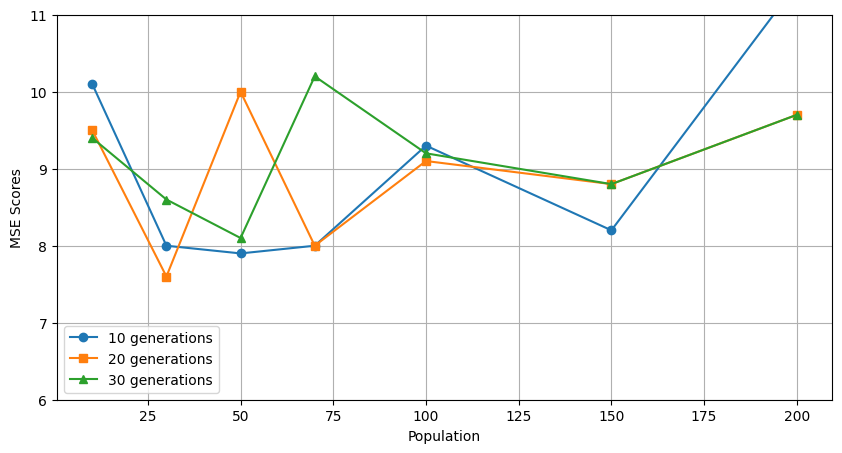

In [ ]:
import matplotlib.pyplot as plt

# Data for the line graphs
populations = [10, 30, 50, 70, 100, 150, 200]
mse_10_gen = [10.1, 8.0, 7.9, 8.0, 9.3, 8.2, 11.4]
mse_20_gen = [9.5, 7.6, 10.0, 8.0, 9.1, 8.8, 9.7]
mse_30_gen = [9.4, 8.6, 8.1, 10.2, 9.2, 8.8, 9.7]

# Create the line graph
plt.figure(figsize=(10, 5))
plt.plot(populations, mse_10_gen, marker='o', label='10 generations')
plt.plot(populations, mse_20_gen, marker='s', label='20 generations')
plt.plot(populations, mse_30_gen, marker='^', label='30 generations')

# Set the x and y axis labels
plt.xlabel('Population')
plt.ylabel('MSE Scores')

# Set the y axis limits
plt.ylim(6, 11)

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()


GENERATION, POPULATION PAIRS TO TRY

10, 10

10, 30

10, 50

10, 70

10, 100

10, 150

10, 200

do same for generation = 20 and generation = 30